# Project Report 

# **Using Blood Pressure and Cholestrol to Predict Heart Disease In Patients From Cleveland.**

### Livleen Randhawa 

## Introduction

The term heart disease refers to a type of disease that effects the heart and/or blood vessels. Risk factors for heart disease include high blood pressure and high cholesterol (National Cancer Institute, n.d.).

High blood pressure is linked to heart disease as it can narrow and damage the arteries that deliver blood to the heart (Mayo Clinic, 2023). While Cholesterol is important for healthy cells, high levels of cholesterol result in fatty deposits in blood vessels that clog them. The deposits grow, restricting blood flow linking high cholesterol to heart disease (Mayo Clinic, 2023).

The objective  of this project will be to use these risk factors to classify patients based on likeliness to have heart disease.

The question I will be addressing is: **Can the blood pressure and cholesterol of a patient accurately predict whether they have heart disease or not?**

To address this question I will use a k-nearest neighbours alogrithim

I am using `processed.cleveland.data` from the Heart Disease Database to predict if a patient from Cleveland will have heart disease. The columns are:

age: age

sex: sex (1 = male, 0 = female)

cp: chest pain type

trestbps: resting blood pressure in mmHg

chol: serum cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: whether exercise induced angina (1 = True, 0 = False)

oldpeak: ST depression induced by exercise, relative to rest

slope: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)

ca: number of major vessels (0-3) colored by flourosopy

thal: (3 = normal, 6 = fixed defect, 7 = reversable defect)

num: diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)

With reference to the list above, I will be using `chol` and `trestbps` as the predictors in my algorithm to classify patients on whether they do or do not have heart disease.

## Methods 

### **Preprocessing and Exploratory Data Analysis**

In order to preprocess and explore the dataset I will:  

&emsp;1. Import libraries and `processed.cleveland.data` dataset from the web.

&emsp;2. Clean and tidy the data, by assigning a new column and column types.  

&emsp;3. Split the data into training and testing sets, and exclusively work with the training set until the testing set until the testing set is needed for classification  

&emsp;4. Summarize the training set based upon the predictors `chol` and `trestbps`   

&emsp;5. Make a visualization of the relationship between `chol` and `trestbps` 
with respect to the presence or absence of heart disease 

#### Importing Libraries and the Dataset 

We first import the libraries, and format the graphs. Then use `read_csv` to import the `processed.cleveland.data` dataset and set the seed. 

In [1]:
#add library
library(tidyverse)
library(repr)
library(tidymodels)
#format graph
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
#set the seed 
set.seed(4567)

In [3]:
#reading in the data
cleveland_data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE)
head(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1 X2 X3 X4  X5  X6 X7 X8  X9 X10 X11 X12 X13 X14
1 63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2 67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3 67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
4 37 1  3  130 250 0  0  187 0  3.5 3   0.0 3.0 0  
5 41 0  2  130 204 0  2  172 0  1.4 1   0.0 3.0 0  
6 56 1  2  120 236 0  0  178 0  0.8 1   0.0 3.0 0

**Figure 1. Untided Cleveland Dataset:** This table is the first six rows of the cleveland dataset before tidying. The information given in this table provides me with insight for what I need to do to tidy the data.

#### Cleaning and Tidying the Data 

The first step in tidying the data is adding column names as the imported dataset did not have any. Secondly, the `num` column is to be changed to a binary operator to state only `absense` or `presence`. Thirdly, columns with missing values are to be removed.

In [4]:
#adding column names 
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope","ca", "thal", "num")

#making the target binary 
cleveland_data <- cleveland_data|> 
                   mutate(num = as.factor(case_when(num >= 1 ~ "presence",
                                          num == 0 ~ "absence")))

#removing columns with NA values 
cleveland_data <- cleveland_data|>
                  select(-ca, -thal)
cleveland_data

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope num     
1   63  1   1  145      233  1   2       150     0     2.3     3     absence 
2   67  1   4  160      286  0   2       108     1     1.5     2     presence
3   67  1   4  120      229  0   2       129     1     2.6     2     presence
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮       
301 57  1   4  130      131  0   0       115     1     1.2     2     presence
302 57  0   2  130      236  0   2       174     0     0.0     2     presence
303 38  1   3  138      175  0   0       173     0     0.0     1     absence

**Figure 2. Tidied Cleveland Data:** By tidying the cleveland dataset I added column names, changed the column `num` to a binary operator so rather then a numeric scale it simply indcates whether or not the patient has heart disease, and I removed columns that had missing values.

#### Spliting the Data into Training and Testing Sets 

Before I begin data analysis it is necessary to split the data into training anf testing sets. The data frame will be split into 75% testing and 25% training. This will allow for the most effective training and testing.

In [5]:
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

head(cleveland_train)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope num    
1 63  1   1  145      233  1   2       150     0     2.3     3     absence
2 37  1   3  130      250  0   0       187     0     3.5     3     absence
3 41  0   2  130      204  0   2       172     0     1.4     1     absence
4 56  1   2  120      236  0   0       178     0     0.8     1     absence
5 57  0   4  120      354  0   0       163     1     0.6     1     absence
6 57  1   4  140      192  0   0       148     0     0.4     2     absence

**Figure 3. Cleveland training data:** In the code above I split the data, into both training and testing sets. The function `intial_split` was used to evenly distibute the data between both sets to avoid any bias towards the absence or presence of heart disease in either set. A split of 75% in training and 25% in testing allows for optimal training and testing.

#### Summarizing the data

Before performing knn analysis we will first do some exploratory data analysis to determine whether my predictors will be effective. To do so I will create a table that contains the mean values of my predictors in the absence and presence of heart disease.

In [6]:
#summary of training data 
cleveland_train_explore <- cleveland_train|>
                            select(chol, trestbps, num)|>
                            group_by(num) |>
                            summarize(
                            count = n(),
                            mean_chol = mean(chol),
                            mean_trestbps = mean(trestbps)
                            )
cleveland_train_explore

num      count mean_chol mean_trestbps
1 absence  123   243.6829  128.8943     
2 presence 104   253.0288  132.9423

**Figure 4. Summary Table:** From the results in the table we can see that the mean cholestrol is higher in the presences of heart disease and the mean resting blood pressure is higher in the presence of heart diease. Therefore the trends are as expected.

#### Creating a Visulization of the relationship between predictors

To visualize the relationship that cholesterol and resting blood pressure  with respect to a patient's diagnosis, we will use ggplot to generate a scatter plot of chol vs trestbps, colouring for num and adding a line to indicate high cholestrol and high blood pressure.

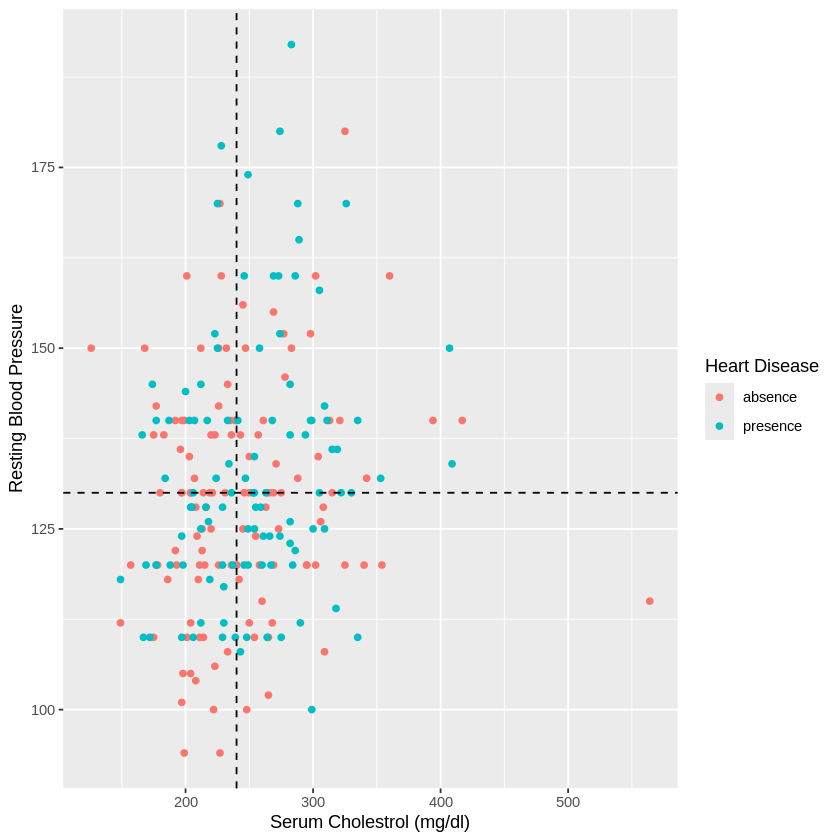

In [7]:
#visualization of training data 
cleveland_plot <- ggplot(cleveland_train, aes(x= chol, y = trestbps, color = num))+
        geom_point()+
        xlab("Serum Cholestrol (mg/dl)")+
        ylab("Resting Blood Pressure")+
        geom_vline(xintercept=240, linetype=2)+
        geom_hline(yintercept=130, linetype=2)+
        labs(colour = "Heart Disease")
cleveland_plot 

**Figure 5. Visualization of Relationships:** This graph does indicate that there is a relationship between high cholestrol and high resting blood presure with the presence of heart disease. There are more blue dots (presence) above the threshold for high blood pressure and cholestrol. This confirms the summary data and allows us to see the spread of data.

### **Finding the Best $k$ value**

Our goal is to find the best value for the k-nearest neighbours algorithim, providing the highest accuracy in predictions. Next we need to split the training data by creating a classifier and perfrom cross validation, we train the model with one set and evaluate with the other as we cannot use the testing data. In order to do this I will:

&emsp;1. Use the recipe function to center and scale the data.

&emsp;2. Perform cross-validation with ten folds, using vfold_cv, on the training data.

&emsp;3. Create a k-nearest model with neighbours = tune() instead of a value to find the best value for k-nearest neighbours.

&emsp;4. Add the recipe and model to a workflow, using tune_grid to fit. This worfklow runs cross validation on a range of k-nearest neighbours values that is specified in gridvals.

&emsp;5.Find the best $k$ value by filtering for accuracy and plotting a line plot with the accuracy estimate on the y-axis and $k$ on the x-axis.



#### Creating the model 

In order to create the model we need to do the following steps: (1) Create a recipe using `cleveland_training` with `chol` and `trestbps` as the predictors (2) Create a specification using k-nearest neighbours (3) Perform V-fold cross validation (4) Create a workflow

In [8]:
set.seed(4567)
#recipe 
cleveland_recipe <- recipe(num ~ chol + trestbps, data = cleveland_train)|>
                    step_scale(all_predictors())|>
                    step_center(all_predictors())

#K-nearest neighbours specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbor = tune())|>
            set_engine("kknn")|>
            set_mode("classification")

#10 fold-cross validation
cleveland_vfold <- vfold_cv(cleveland_train, v = 10, strata = num)

#gridvals 
gridvals <- tibble(neighbors = c(1:100))
                   
#workflow 
knn_workflow <- workflow()|>
                add_recipe(cleveland_recipe)|>
                add_model(knn_tune)|>
                tune_grid(resamples = cleveland_vfold, grid = gridvals)

#collect metrics 
knn_results <- knn_workflow|>
                collect_metrics()|>
                filter(.metric == "accuracy")|>
                select(neighbors, mean)|>
                arrange(desc(mean))

head(knn_results)

neighbors mean     
1 15        0.5781126
2 59        0.5741436
3 60        0.5741436
4 57        0.5737648
5 58        0.5737648
6 16        0.5735672

**Figure 6. k-nn results:** Both 15 and 59 give a 57% accuracy so inorder to pick one we need to plot it. 

#### Visualizing knn results

Using `ggplot` we can decide which k value gives us the best accuracy.

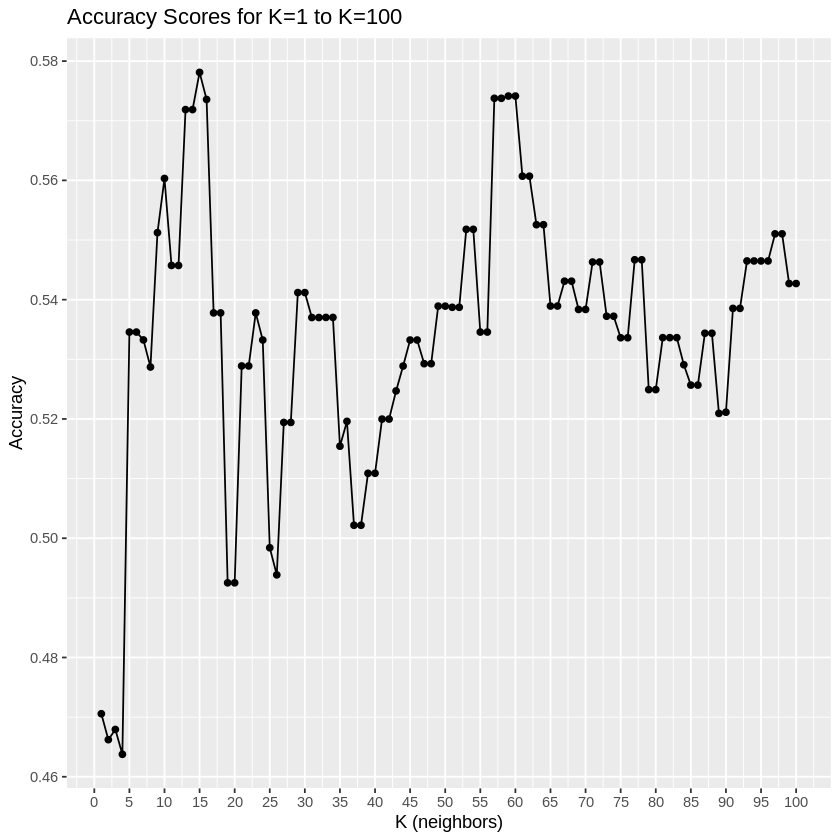

In [9]:
accuracy_plot <- ggplot(knn_results, aes(x=neighbors, y=mean))+
                 geom_point()+
                 geom_line()+
                 xlab("K (neighbors)")+
                 ylab("Accuracy")+
                 ggtitle("Accuracy Scores for K=1 to K=100")+
                 scale_x_continuous(breaks = seq(0,100, by=5))
accuracy_plot

**Figure 7. Accuracy Plot:** From the plot we can tell that k = 15 is a better option then k = 59 as it will be quicker and more accurate .

#### Creating the Final Model Using the K value

Now that we have the k value with the highest accuracy we can create our final model using k = 15.

In [10]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 15)|>
            set_engine("kknn")|>
            set_mode("classification")

cleveland_fit <- workflow()|>
                 add_recipe(cleveland_recipe)|>
                 add_model(knn_spec)|>
                 fit(cleveland_train)
cleveland_fit               

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(15,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4581498
Best kernel: rectangular
Best k: 15

### **Visualizing the Analysis**

Next we want to visualize the results from find the best $k$ value. In order to do this I will: 

&emsp;1. Create a plot examing the relationship between the two predictors with respect to the presence or absence of heart disease and add lines indicated where the threshold for high cholestrol and blood pressure is. 

&emsp;2. Check for overfiitng or underfitting by colouring the background based on what the model would predict at each point. 

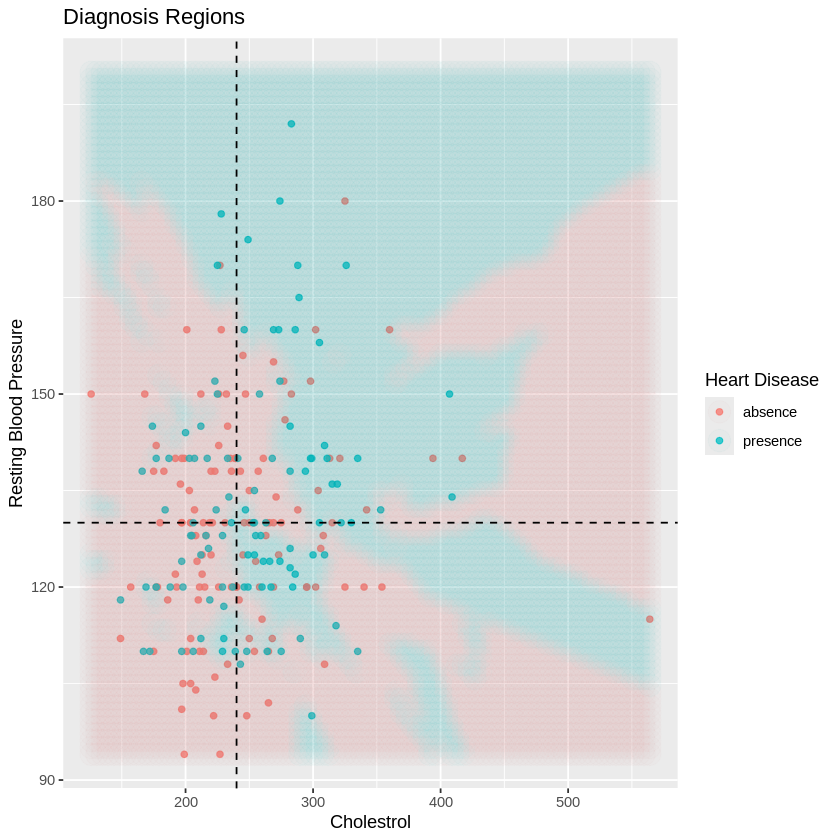

In [11]:
#colouring the background of the graph
trestbps_grid <- seq(min(cleveland_data$trestbps),
                     max(cleveland_data$trestbps),
                     length.out = 100)
chol_grid <- seq(min(cleveland_data$chol),
                     max(cleveland_data$chol),
                     length.out = 100)
as_grid <- as_tibble(expand.grid(trestbps = trestbps_grid,
                                chol = chol_grid))

pred_grid <- predict(cleveland_fit, as_grid)

pred_table <- bind_cols(pred_grid, as_grid)|>
                rename(num = .pred_class)

results_plot <- ggplot()+
                geom_point(cleveland_train, mapping = aes(x = chol, y=trestbps,
                                                color = num), alpha = 0.75)+
                geom_point(pred_table, ,mapping = aes(x = chol, y=trestbps,
                                                color = num), alpha = 0.02,
                                                 size = 6) +
                xlab("Cholestrol")+
                ylab("Resting Blood Pressure")+
                labs(color = "Heart Disease", title = "Diagnosis Regions")+
                geom_vline(xintercept=240, linetype=2)+
                geom_hline(yintercept=130, linetype=2)
results_plot

**Figure 8: Diagnosis Regions Plot:** Based on the plot the classifier is a good fit for the data set so it should do a good job at classifying data.

### **Testing the Classifier**

To test the classifier we need to try it on the testing set. In order to do this I will need to: 

&emsp;1. Use `predict` on the testing set to evaluate the classifiers accuracy on new data.

&emsp;2. Produce a confusion matrix to see which diagnosis the classifer is better at predicting 

In [12]:
#predict
set.seed(4567)
predictions <- predict(cleveland_fit, cleveland_test)|>
                        bind_cols(cleveland_test)

#find the accuracy of the predictions 
metrics <- predictions|>
            metrics(truth = num, estimate = .pred_class)|>
            filter(.metric == "accuracy")

metrics 

#confusion matrix

conf_mat <- predictions |>
                conf_mat(truth = num, estimate = .pred_class)
conf_mat

.metric  .estimator .estimate
1 accuracy binary     0.6184211

          Truth
Prediction absence presence
  absence       31       19
  presence      10       16

**Figure 10. Accuracy and Connfusion Matrix:** The classifier has an accuracy of 61.8%. It seems like it will underdiagose, as indicated by the classifer predicting an absense 19 times when there was a presence, and prediciting a presence 10 times when there was an absence.  

## Discussion 

### Summary of Findings 

The question we were trying to answer by using the classifer is: **Can the blood pressure and cholesterol of a patient accurately predict whether they have heart disease or not?**    
The classifier I created had an accuracy score of 61.8% which is relatively low when prediciting something as serious as heart disease. The classifier has a tendency to under diagnose rather than over diagnose. This could have negtaive consequences if used in practice as it usually better to err on the side of caution. Based upon this we can tell that the classifer cannot be used in place of a diagnosis from a medical professional as a disease serious as heart disease should rely upon an in person diagnosis.   

### Expected Findings vs Results 

### Impact of Findings 

### Future Questions

## References 

1. Mayo Foundation for Medical Education and Research. (2023). High cholesterol. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=Your%20body%20needs%20cholesterol%20to,to%20flow%20through%20your%20arteries. 
2. Mayo Foundation for Medical Education and Research. (2023). How high blood pressure can affect the body. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/high-blood-pressure/art-20045868 
3. NCI Dictionary of Cancer terms. Comprehensive Cancer Information - NCI. (n.d.). https://www.cancer.gov/publications/dictionaries/cancer-terms/def/heart-disease
4. de Roos, B. (2021). Diet, blood pressure, and heart disease—precision nutrition approaches to understand response to diet and predict disease risk. The American Journal of Clinical Nutrition, 114(5), 1581–1582. https://doi.org/10.1093/ajcn/nqab313
5. UC Irvine. (1988). Heart disease. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease 